**Problem Statement:**

An online retail store is trying to understand the various customer purchase patterns for their
firm, you are required to give enough evidence based insights to provide the same.

**Dataset Information:**

The online_retail.csv contains 541909 rows and 8 columns.

1. Invoice - Invoice number
2. StockCode - Product ID
3. Description - Product Description
4. Quantity - Quantity of the product
5. InvoiceDate - Date of the invoice
6. Price - Price of the product per unit
7. CustomerID - Customer ID
8. Country - Region of Purchase

**Problem Objective:**

1. Using the above data, find useful insights about the customer purchasing history that can be an added advantage for the online retailer.
2. Segment the customers based on their purchasing behavior.

In [3]:
# Importing libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.cluster import KMeans

In [4]:
# Reading the dataset
df = pd.read_csv('OnlineRetail.csv', encoding='latin1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# Data Preprocessing and EDA:

In [5]:
df.shape

(541909, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
# Drop rows with missing values
df = df.dropna(subset=['Description'])
df = df.dropna(subset=['CustomerID'])

In [9]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [10]:
df.shape

(406829, 8)

In [11]:
# Convert 'CustomerID' to integer
df['CustomerID'] = df['CustomerID'].astype(int)

In [12]:
# Convert 'InvoiceDate' to datetime datatype
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  int32         
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 26.4+ MB


In [14]:
# Summary statistics
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,406829.000000,406829,406829.000000,406829.000000
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471,15287.690570
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13953.000000
50%,5.000000,2011-07-31 11:48:00,1.950000,15152.000000
75%,12.000000,2011-10-20 13:06:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,248.693370,NaN,69.315162,1713.600303


# Feature Engineering:

In [16]:
# Total sales over time
df['TotalSales'] = df['Quantity'] * df['UnitPrice']

# Ensure InvoiceDate is datetime and extract year-month for grouping
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

# Sales by Day and Hour
df['Hour'] = df['InvoiceDate'].dt.hour
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,YearMonth,Hour,DayOfWeek
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,8,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,8,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,8,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,8,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,8,2


# Data Visualization:

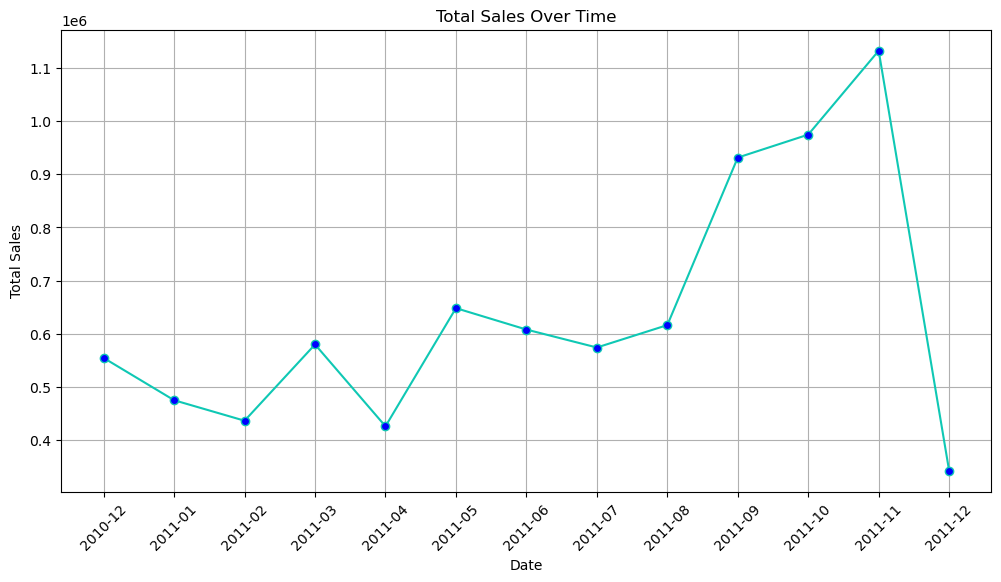

In [18]:
# Sales analysis
# Group by YearMonth and calculate total sales
sales_over_time = df.groupby('YearMonth').agg({'TotalSales': 'sum'}).reset_index()

# Convert YearMonth to string for plotting
sales_over_time['YearMonth'] = sales_over_time['YearMonth'].astype(str)

# Plot total sales over time
plt.figure(figsize=(12, 6))
plt.plot(sales_over_time['YearMonth'], sales_over_time['TotalSales'], marker='o', markerfacecolor='blue', c='#0FC8B4')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [17]:
# Customer analysis
unique_customers = df['CustomerID'].nunique()
average_purchase_value = df['TotalSales'].mean()

# Display customer analysis
print('No. of Unique customers:',unique_customers)
print('Average purchase value:',average_purchase_value)

No. of Unique customers: 4372
Average purchase value: 20.401853884555923


In [15]:
# Top-selling products
top_products = df.groupby('Description').agg({'Quantity': 'sum'}).sort_values(by='Quantity', ascending=False).head(10)
top_products

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,53215
JUMBO BAG RED RETROSPOT,45066
ASSORTED COLOUR BIRD ORNAMENT,35314
WHITE HANGING HEART T-LIGHT HOLDER,34147
PACK OF 72 RETROSPOT CAKE CASES,33409
POPCORN HOLDER,30504
RABBIT NIGHT LIGHT,27094
MINI PAINT SET VINTAGE,25880
PACK OF 12 LONDON TISSUES,25321


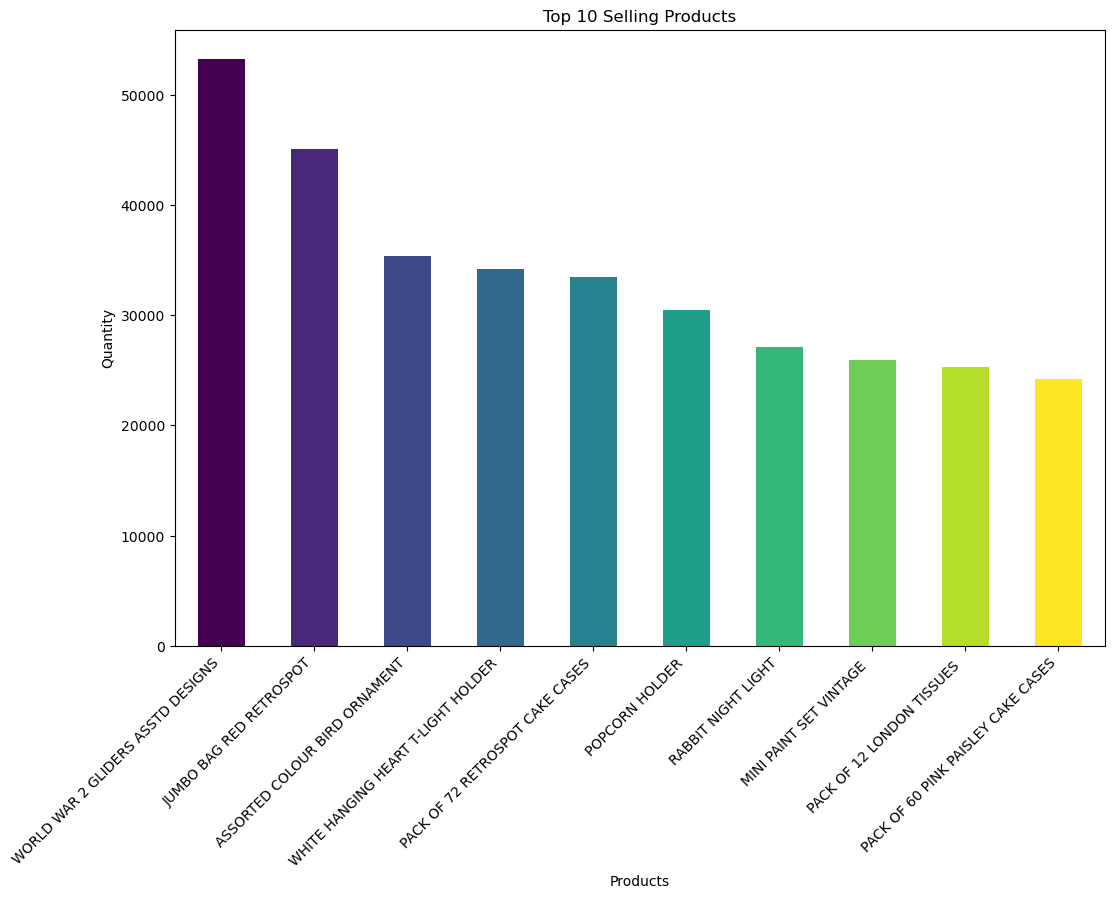

In [19]:
# plotting the top 10 products
plt.figure(figsize=(12, 8))
colors = plt.cm.viridis(np.linspace(0, 1, 10))
top_products['Quantity'].plot(kind='bar', color=colors)
plt.title('Top 10 Selling Products')
plt.xlabel('Products')
plt.ylabel('Quantity')
plt.xticks(rotation=45, ha='right')
plt.show()

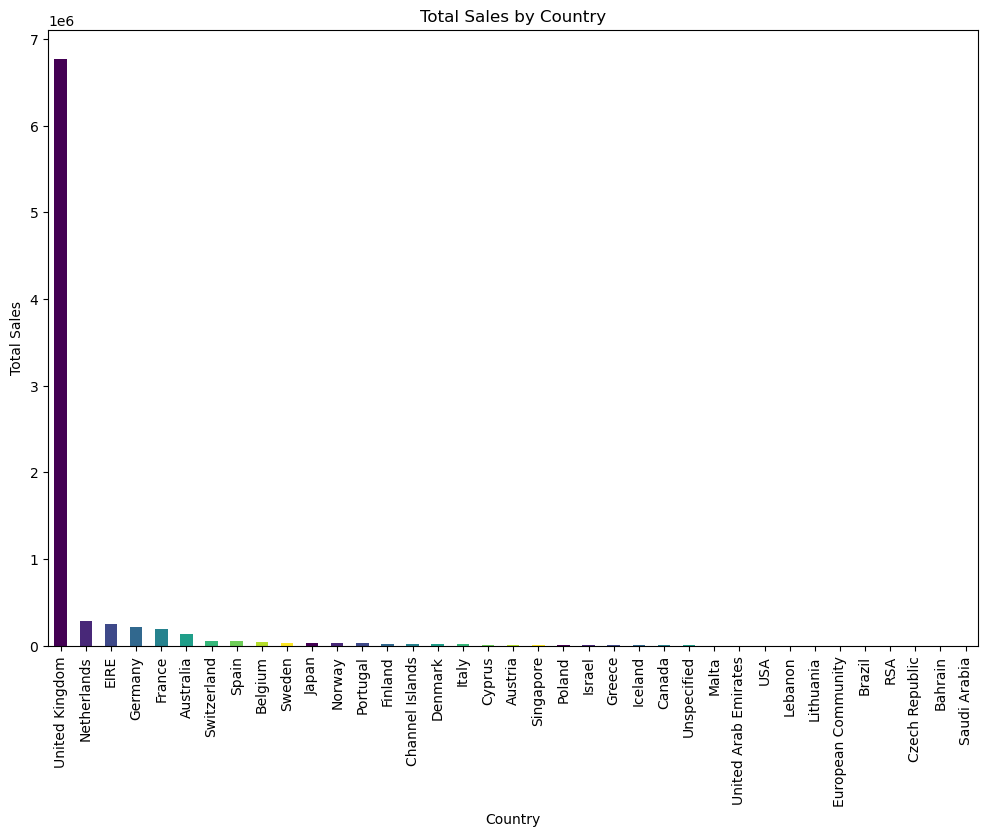

In [20]:
# Sales by Country
sales_by_country = df.groupby('Country').agg({'TotalSales': 'sum'}).sort_values(by='TotalSales', ascending=False)

# Plot sales by country
plt.figure(figsize=(12, 8))
sales_by_country['TotalSales'].plot(kind='bar', color=colors)
plt.title('Total Sales by Country')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()

<Figure size 1200x800 with 0 Axes>

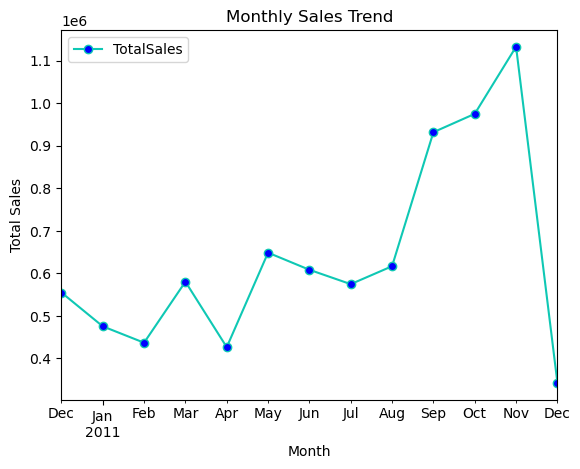

In [21]:
# Monthly Sales Trend
monthly_sales = df.groupby('YearMonth').agg({'TotalSales': 'sum'}).reset_index()

# Plot monthly sales trend
plt.figure(figsize=(12, 8))
monthly_sales.plot(x='YearMonth', y='TotalSales', kind='line', marker='o', markerfacecolor='blue', c='#0FC8B4')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks()
plt.show()

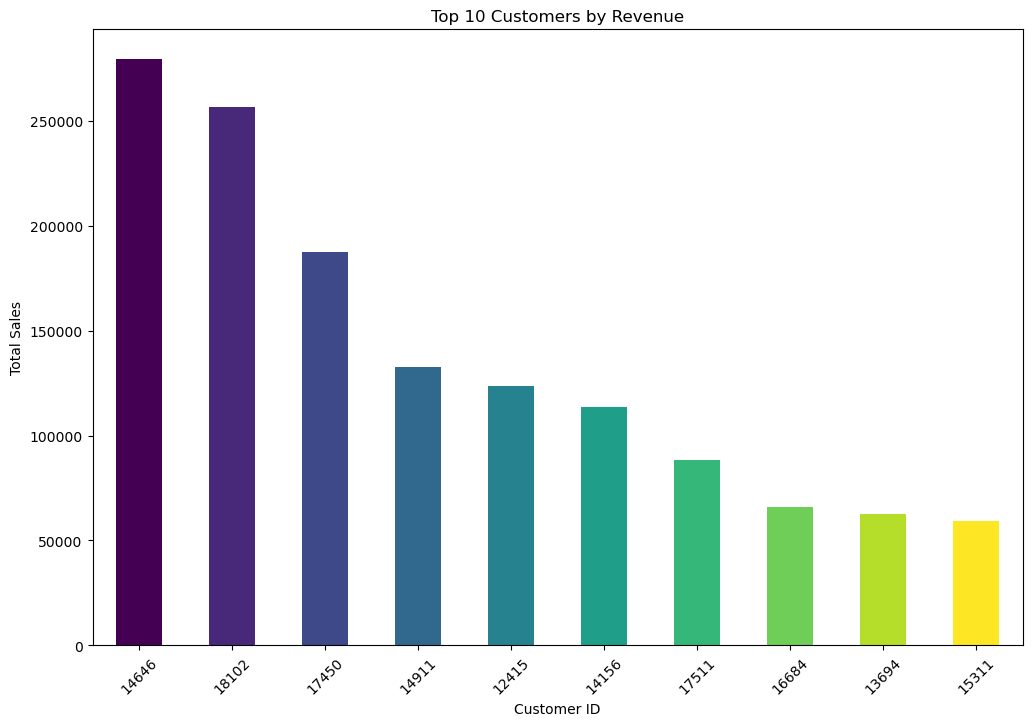

In [22]:
# Top Customers by Revenue
top_customers = df.groupby('CustomerID').agg({'TotalSales': 'sum'}).sort_values(by='TotalSales', ascending=False).head(10)

# Plot top customers by revenue
plt.figure(figsize=(12, 8))
top_customers['TotalSales'].plot(kind='bar', color=colors)
plt.title('Top 10 Customers by Revenue')
plt.xlabel('Customer ID')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

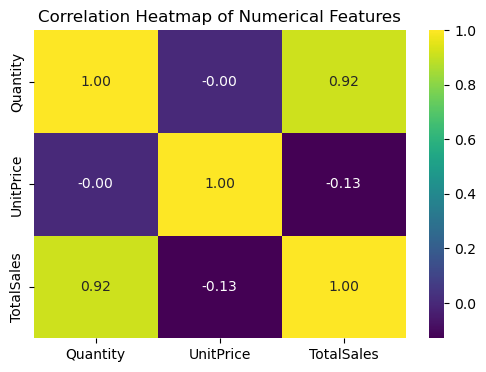

In [23]:
# Compute the correlation matrix
numerical_features = ['Quantity', 'UnitPrice', 'TotalSales']
corr_matrix = df[numerical_features].corr()

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='viridis')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

TotalSales and Quantity are highly correlated.

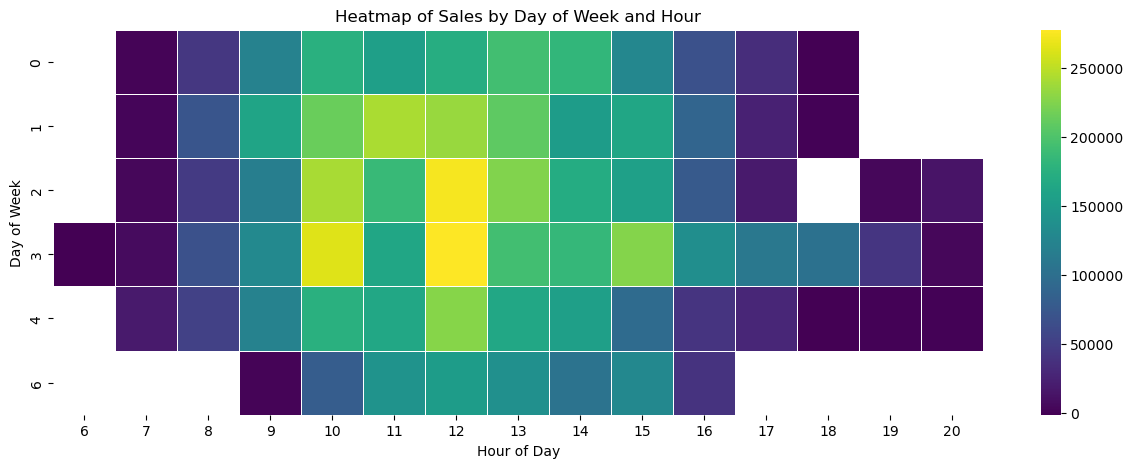

In [24]:
sales_heatmap = df.pivot_table(values='TotalSales', index='DayOfWeek', columns='Hour', aggfunc='sum')

# Plot heatmap
plt.figure(figsize=(15, 5))
sns.heatmap(sales_heatmap, cmap='viridis', linewidths=.5)
plt.title('Heatmap of Sales by Day of Week and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()

We can see that sales are higher during mid-week between 10am to 1pm.

# RFM Analysis:

In [25]:
# Remove negative values in Quantity and UnitPrice
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

# Calculate the Recency, Frequency, and Monetary values
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

# Recency: Calculate the number of days since the last purchase for each customer.
recency_df = df.groupby('CustomerID')['InvoiceDate'].max().reset_index()
recency_df['Recency'] = (snapshot_date - recency_df['InvoiceDate']).dt.days

# Frequency: Count the number of unique invoices for each customer.
frequency_df = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
frequency_df.columns = ['CustomerID', 'Frequency']

# Monetary: Sum the total sales for each customer.
monetary_df = df.groupby('CustomerID')['TotalSales'].sum().reset_index()
monetary_df.columns = ['CustomerID', 'Monetary']

# Combine RFM scores into one DataFrame
rfm_df = recency_df.merge(frequency_df, on='CustomerID').merge(monetary_df, on='CustomerID')
rfm_df.drop(columns='InvoiceDate', inplace=True)

# Normalize the RFM values to have mean 0 and standard deviation 1 for clustering
rfm_normalized = rfm_df[['Recency', 'Frequency', 'Monetary']].apply(lambda x: (x - x.mean()) / x.std())

# Machine Learning Model Development:

C:\Users\thees\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


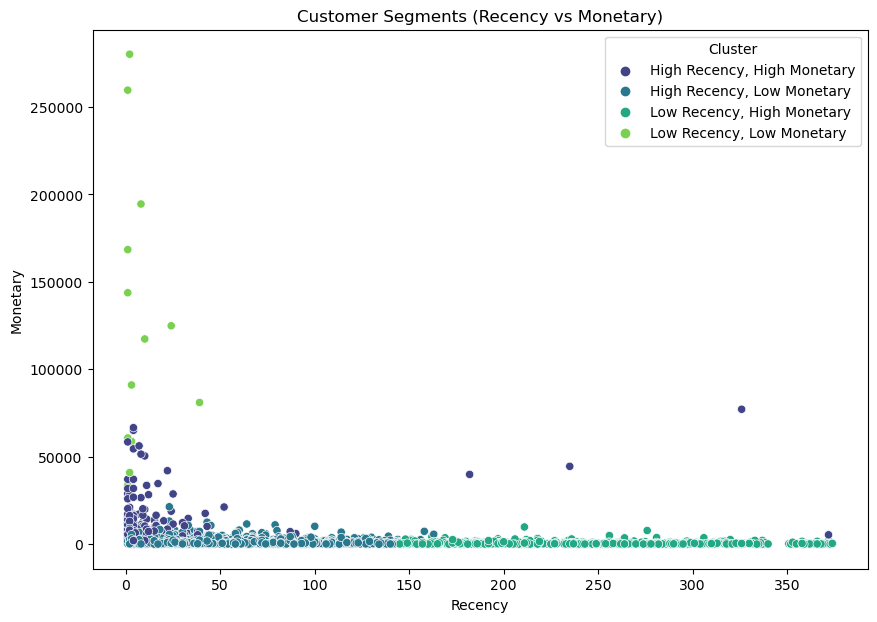

Cluster Centers (Normalized RFM):
[[-0.48826819 -0.07655283 -0.0773389 ]
 [ 1.55517457 -0.3533386  -0.17505937]
 [-0.85139744 10.16711729 13.93712712]
 [-0.77025509  2.34623586  1.18528767]]


In [26]:
# Clustering using KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(rfm_normalized)
rfm_df['Cluster'] = kmeans.labels_

# Define cluster names
cluster_names = {
    0: 'High Recency, Low Monetary',
    1: 'Low Recency, High Monetary',
    2: 'Low Recency, Low Monetary',
    3: 'High Recency, High Monetary'
}

# Map cluster labels to names
rfm_df['ClusterName'] = rfm_df['Cluster'].map(cluster_names)

# Plot the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Recency', y='Monetary', hue='ClusterName', data=rfm_df, palette='viridis')
plt.title('Customer Segments (Recency vs Monetary)')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.legend(title='Cluster')
plt.show()

# Display the cluster centers
print("Cluster Centers (Normalized RFM):")
print(kmeans.cluster_centers_)

In [27]:
# Display the cluster centers in original RFM values
rfm_cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=['Recency', 'Frequency', 'Monetary'])
rfm_cluster_centers = rfm_cluster_centers * rfm_df[['Recency', 'Frequency', 'Monetary']].std() + rfm_df[['Recency', 'Frequency', 'Monetary']].mean()
print("Cluster Centers (Original RFM values):")
print(rfm_cluster_centers)

# Describe each cluster
cluster_descriptions = rfm_df.groupby('Cluster').agg({
    'Recency': ['mean', 'std'],
    'Frequency': ['mean', 'std'],
    'Monetary': ['mean', 'std'],
    'CustomerID': 'count'
}).reset_index()
print("Cluster descriptions:")
print(cluster_descriptions)

Cluster Centers (Original RFM values):
      Recency  Frequency       Monetary
0   43.702685   3.682711    1359.049284
1  248.075914   1.552015     480.617480
2    7.384615  82.538462  127338.313846
3   15.500000  22.333333   12709.090490
Cluster descriptions:
  Cluster     Recency             Frequency                  Monetary  \
                 mean        std       mean        std           mean   
0       0   43.702685  35.966256   3.682711   2.856518    1359.049284   
1       1  248.075914  66.330522   1.552015   1.070613     480.617480   
2       2    7.384615  11.485777  82.538462  63.264808  127338.313846   
3       3   15.500000  40.924116  22.333333  11.683286   12709.090490   

                CustomerID  
            std      count  
0   1542.732124       3054  
1    638.698818       1067  
2  79723.434398         13  
3  13160.445845        204  


**Cluster 0:**

Recency: 43.7 days, Frequency: 3.68 purchases, Monetary: $1359.05

**Cluster 1:**

Recency: 248.08 days, Frequency: 1.55 purchases, Monetary: $480.62

**Cluster 3:**

Recency: 15.5 days, Frequency: 22.33 purchases, Monetary: $12,709.09

           Segment  Number of Customers
0   Best Customers                 3054
1  Loyal Customers                 1067
2          At Risk                  204
3     Big Spenders                   13


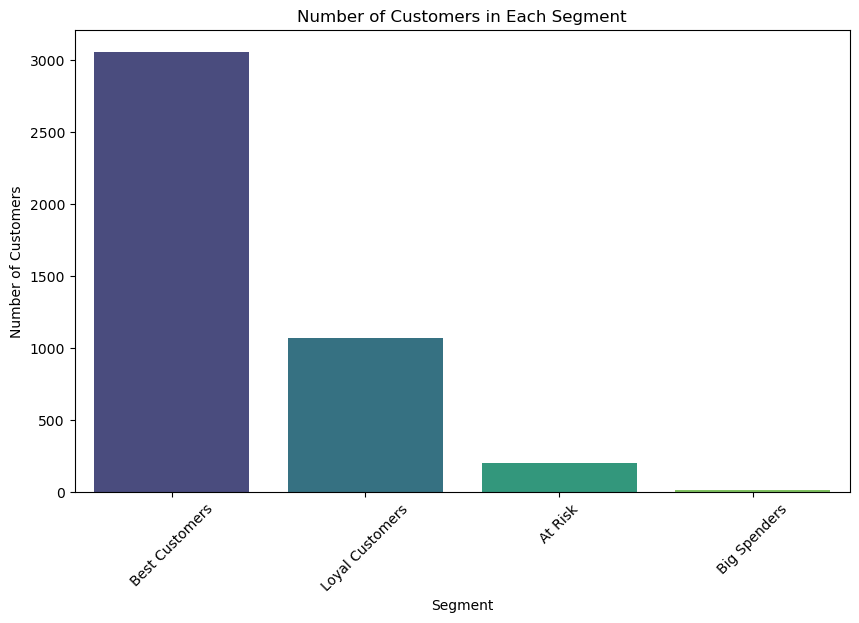

In [28]:
# Customer Segmentation
# Create descriptive labels for each cluster
cluster_names = {
    0: 'Best Customers',
    1: 'Loyal Customers',
    2: 'Big Spenders',
    3: 'At Risk'
}

# Map cluster labels to names
rfm_df['ClusterName'] = rfm_df['Cluster'].map(cluster_names)

# Display the number of customers in each segment
segment_counts = rfm_df['ClusterName'].value_counts().reset_index()
segment_counts.columns = ['Segment', 'Number of Customers']
print(segment_counts)

# Plot the distribution of customers in each segment
plt.figure(figsize=(10, 6))
sns.barplot(x='Segment', y='Number of Customers', data=segment_counts, palette='viridis')
plt.title('Number of Customers in Each Segment')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

**Cluster 0: Best Customers**

Characteristics:
-  Moderate recency (average days since last purchase)
-  Low frequency (number of purchases)
-  Moderate monetary value

Insights:
-  These are valuable customers who make frequent purchases.
-  Focus on loyalty programs and personalized marketing.

**Cluster 1: Loyal Customers**

Characteristics:
-  High recency (last purchase was long ago)
-  Very low frequency
-  Low monetary value

Insights:
-  These customers have not purchased recently but have a history of frequent purchases.
-  Send re-engagement campaigns and special discounts.

**Cluster 2: Big Spenders**

Characteristics:
-  Very low recency (recent purchase)
-  Extremely high frequency
-  Very high monetary value

Insights:
-  These are the highest value customers who buy very frequently.
-  Offer exclusive deals, VIP programs, and high-value promotions.

**Cluster 3: At Risk**

Characteristics:
-  Moderate recency
-  Moderate frequency
-  High monetary value

Insights:
-  These customers are valuable but at risk of churning.
-  Offer win-back campaigns with special incentives to retain them.

           Segment  Total Sales
0          At Risk  2592654.460
1   Best Customers  4150536.513
2     Big Spenders  1655398.080
3  Loyal Customers   512818.851


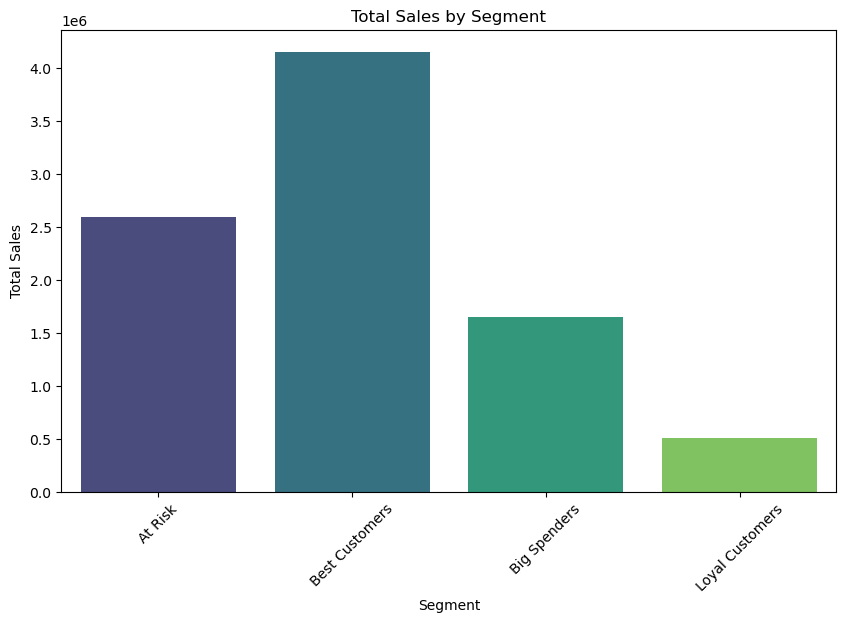

In [29]:
# Calculate the total sales for each segment
segment_sales = rfm_df.groupby('ClusterName').agg({'Monetary': 'sum'}).reset_index()
segment_sales.columns = ['Segment', 'Total Sales']
print(segment_sales)

# Plot total sales by segment
plt.figure(figsize=(10, 6))
sns.barplot(x='Segment', y='Total Sales', data=segment_sales, palette='viridis')
plt.title('Total Sales by Segment')
plt.xlabel('Segment')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# Model Evaluation:

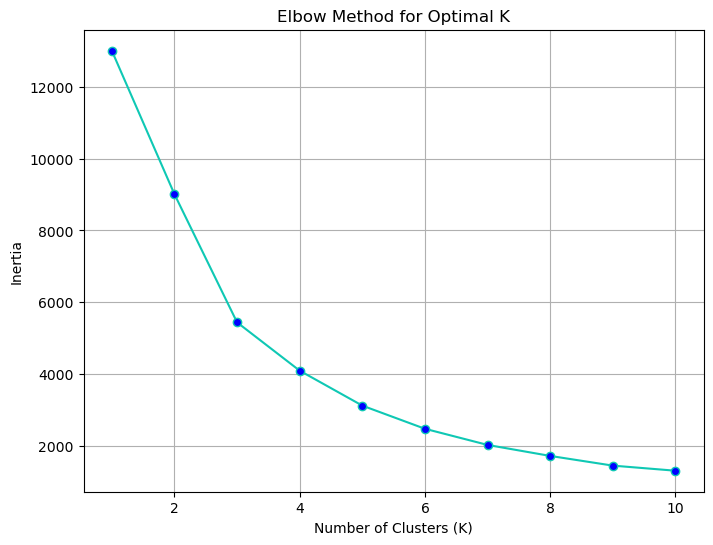

In [32]:
# Calculate inertia for a range of K values
inertia = []
K_range = range(1, 11)
for K in K_range:
    kmeans = KMeans(n_clusters=K, random_state=42, n_init=10)
    kmeans.fit(rfm_normalized)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia, marker='o', markerfacecolor='blue', c='#0FC8B4')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

From the above Elbow curve, 4 is the optimal value for 'k'.

# Conclusion:

**Strategic Actions Based on Segments:**

**Best Customers (3054 Customers, $4,150,536.51 Total Sales):**

**Action:**
-  Focus on maintaining their loyalty. 
-  Provide personalized offers, loyalty rewards, and early access to new products. 
-  Regularly engage with these customers through targeted communication.

**Loyal Customers (1067 Customers, $512,818.85 Total Sales):**

**Action:**
-  Re-engage with these customers. 
-  Use email campaigns, special discounts, and personalized messages to remind them of your products. 
-  Offer incentives to bring them back.

**Big Spenders (13 Customers, $1,655,398.08 Total Sales):**

**Action:**
-  Treat them as VIPs. 
-  Provide top-tier loyalty programs, exclusive access to premium products, and personalized concierge services. 
-  Ensure excellent customer service and maintain close relationships.

**At Risk (204 Customers, $2,592,654.46 Total Sales):**

**Action:**
-  Implement win-back strategies. 
-  Send personalized offers and discounts, conduct satisfaction surveys, and offer incentives to retain them. 
-  Identify potential reasons for their decline in activity and address these issues.